<a href="https://colab.research.google.com/github/AkalaponCh/Machine-Learning/blob/main/Machine%20Failure%20Prediction%20using%20Supervised%20Learning/Predictive_Maintenance_Dataset_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

This project develops a predictive maintenance model using a synthetic dataset from a milling machine. The dataset contains 10,000 data points with 14 features, including operational parameters like temperature, speed, torque, and tool wear. The core target is a binary 'machine failure' label (1 for failure, 0 for no failure), aggregating various underlying failure modes. Due to the dataset's significant imbalance, and the high cost of missed failures, our primary goal is to build a model with high recall for the 'Failure' class. We'll explore Linear Regression, XGBoost, and Random Forest classifiers, assessing their performance both with and without SMOTE for handling class imbalance, to identify the most effective solution for proactive maintenance.

# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# **Loading The Dataset**



In [2]:
df = pd.read_csv('/content/ai4i2020.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


# **Preprocessing The Dataset**

First we focuses on understanding the structure and characteristics of the dataset that we just loaded. By examining various aspects of the data, we can identify potential issues and gain insights before proceeding with further analysis or model building.

In [3]:
print("Data Information:")
print(df.info())

print("\nDuplicated Values:")
print(df.duplicated().sum())

print("\nNumber of Unique Values:")
print(df.nunique())

print("\nData Statistical Summary:")
df.describe().T

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: fl

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0
TWF,10000.0,0.00460,0.067671,0.0,0.00,0.0,0.00,1.0
HDF,10000.0,0.01150,0.106625,0.0,0.00,0.0,0.00,1.0
PWF,10000.0,0.00950,0.097009,0.0,0.00,0.0,0.00,1.0


In [4]:
#Rename the columns to be in the same structure
df.rename(columns={'Type': 'Product_Type', 'Air temperature [K]': 'Air_temperature_K', 'Process temperature [K]': 'Process_temperature_K',
                   'Rotational speed [rpm]': 'Rotational_speed_rpm', 'Torque [Nm]': 'Torque_Nm', 'Tool wear [min]': 'Tool_wear_min', 'Machine failure': 'Machine_failure'}, inplace=True)

**Drop Unnecessary Columns**


In [5]:
# Focus only on whater the machine fail or not
cols_to_drop = ['UDI','Product ID','TWF','HDF','PWF','OSF','RNF']
df.drop(columns=cols_to_drop, inplace=True)

df.head()

,Product_Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine_failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


# **Feature Engineering**

Creating new features from the existing data to potentially improve the performance of machine learning models.

In [6]:
#Introduce more features
df['Temperature_differential'] = (df['Process_temperature_K']-df['Air_temperature_K'])
df['Power_W'] = np.round((df['Torque_Nm']*df['Rotational_speed_rpm']* 2 * np.pi) / 60,4)

df.head()

,Product_Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine_failure,Temperature_differential,Power_W
0,M,298.1,308.6,1551,42.8,0,0,10.5,6951.5906
1,L,298.2,308.7,1408,46.3,3,0,10.5,6826.7227
2,L,298.1,308.5,1498,49.4,5,0,10.4,7749.3875
3,L,298.2,308.6,1433,39.5,7,0,10.4,5927.5047
4,L,298.2,308.7,1408,40.0,9,0,10.5,5897.8166


In [7]:
window_size = 3

features_for_rolling = ['Torque_Nm', 'Rotational_speed_rpm', 'Temperature_differential', 'Power_W']

for feature in features_for_rolling:
    df[f'{feature}_rolling_mean_{window_size}'] = df[feature].rolling(window=window_size).mean()
    df[f'{feature}_rolling_std_{window_size}'] = df[feature].rolling(window=window_size).std()


    df[f'{feature}_rolling_mean_{window_size}'].fillna(df[feature], inplace=True)
    df[f'{feature}_rolling_std_{window_size}'].fillna(0, inplace=True)

In [8]:
df.head()

,Product_Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine_failure,Temperature_differential,Power_W,Torque_Nm_rolling_mean_3,Torque_Nm_rolling_std_3,Rotational_speed_rpm_rolling_mean_3,Rotational_speed_rpm_rolling_std_3,Temperature_differential_rolling_mean_3,Temperature_differential_rolling_std_3,Power_W_rolling_mean_3,Power_W_rolling_std_3
0,M,298.1,308.6,1551,42.8,0,0,10.5,6951.5906,42.800000,0.000000,1551.000000,0.000000,10.500000,0.000000,6951.590600,0.000000
1,L,298.2,308.7,1408,46.3,3,0,10.5,6826.7227,46.300000,0.000000,1408.000000,0.000000,10.500000,0.000000,6826.722700,0.000000
2,L,298.1,308.5,1498,49.4,5,0,10.4,7749.3875,46.166667,3.302020,1485.666667,72.293384,10.466667,0.057735,7175.900267,500.563386
3,L,298.2,308.6,1433,39.5,7,0,10.4,5927.5047,45.066667,5.063925,1446.333333,46.457866,10.433333,0.057735,6834.538300,910.966545
4,L,298.2,308.7,1408,40.0,9,0,10.5,5897.8166,42.966667,5.577036,1446.333333,46.457866,10.433333,0.057735,6524.902933,1060.538630


# **Exploratory Data Analysis**

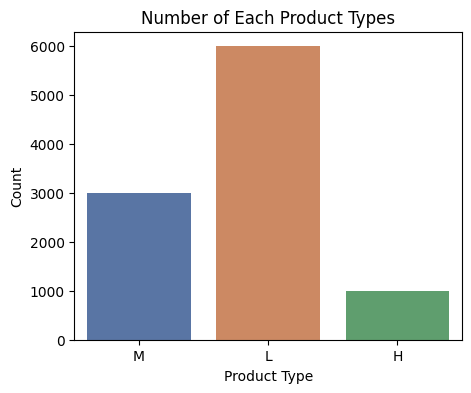

In [9]:
plt.figure(figsize=(5,4))
sns.countplot(x='Product_Type', data=df, hue='Product_Type', palette='deep')
plt.title('Number of Each Product Types')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.show()

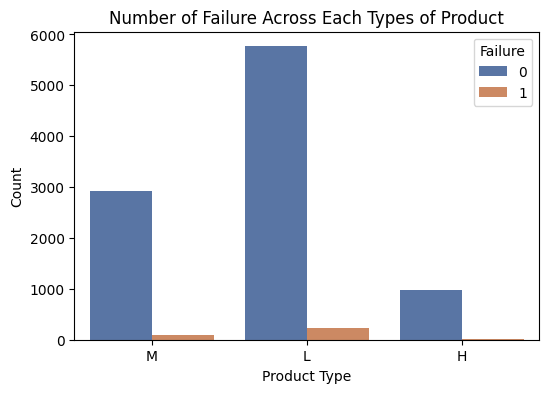

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='Product_Type', data=df, hue='Machine_failure', palette='deep')
plt.title('Number of Failure Across Each Types of Product')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.legend(title='Failure')
plt.show()

In [11]:
#sns.pairplot(df[['Torque_Nm', 'Rotational_speed_rpm', 'Tool_wear_min', 'Temperature_differential','Power_W', 'Machine_failure']], hue='Machine_failure', palette='deep')
#plt.show()

We can see grouping of Machine that fail suggesting pattern of feature that lead to failure in machine

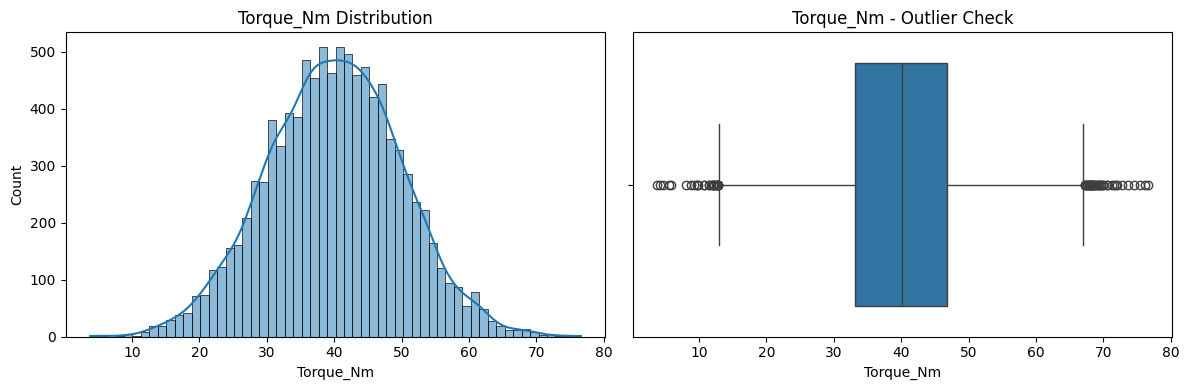

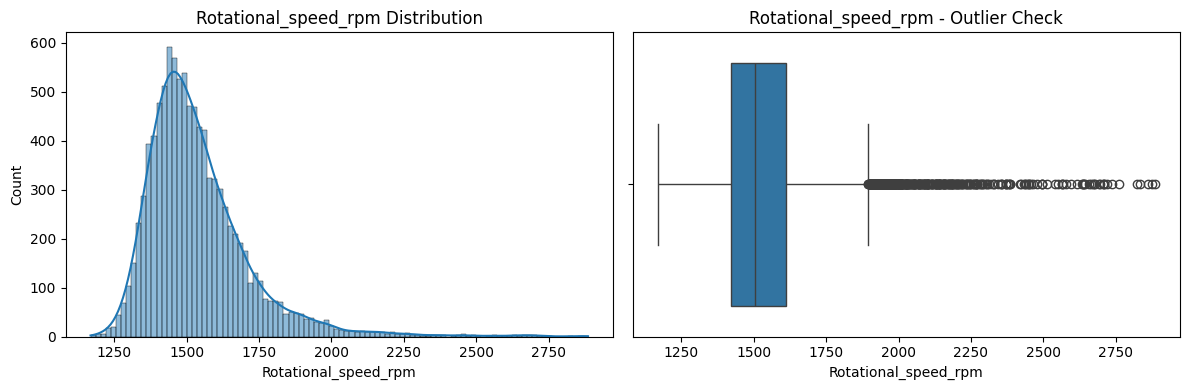

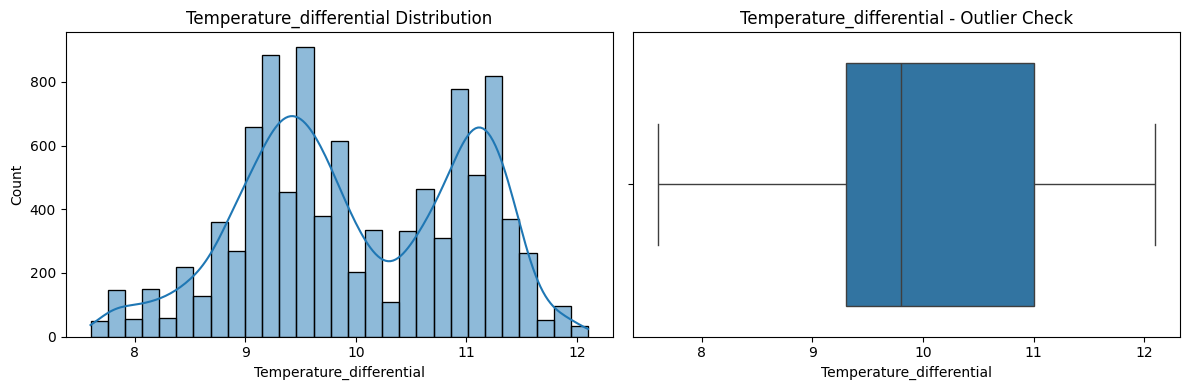

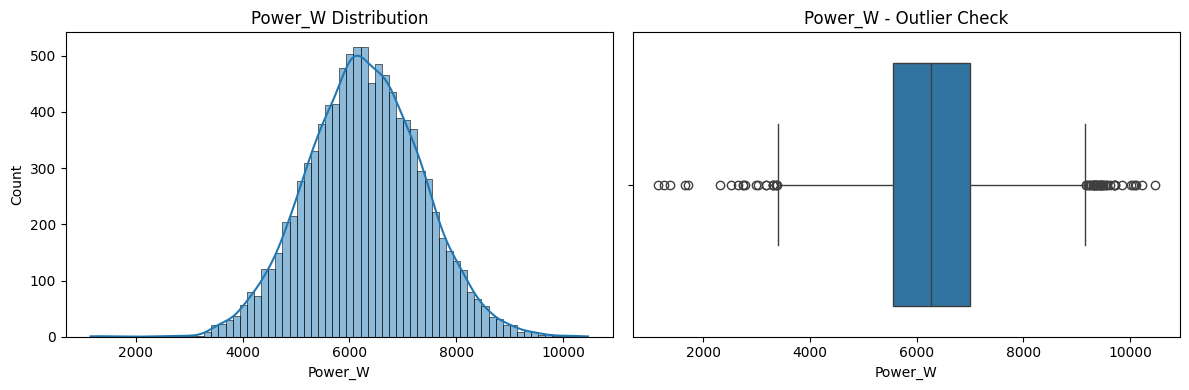

In [12]:
cols = ['Torque_Nm', 'Rotational_speed_rpm', 'Temperature_differential', 'Power_W']

for col in cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

    # Histogram with KDE
    sns.histplot(data=df, x=col, kde=True, ax=axes[0])
    axes[0].set_title(f"{col} Distribution")

    # Boxplot
    sns.boxplot(data=df, x=col, ax=axes[1])
    axes[1].set_title(f"{col} - Outlier Check")

    plt.tight_layout()
    plt.show()

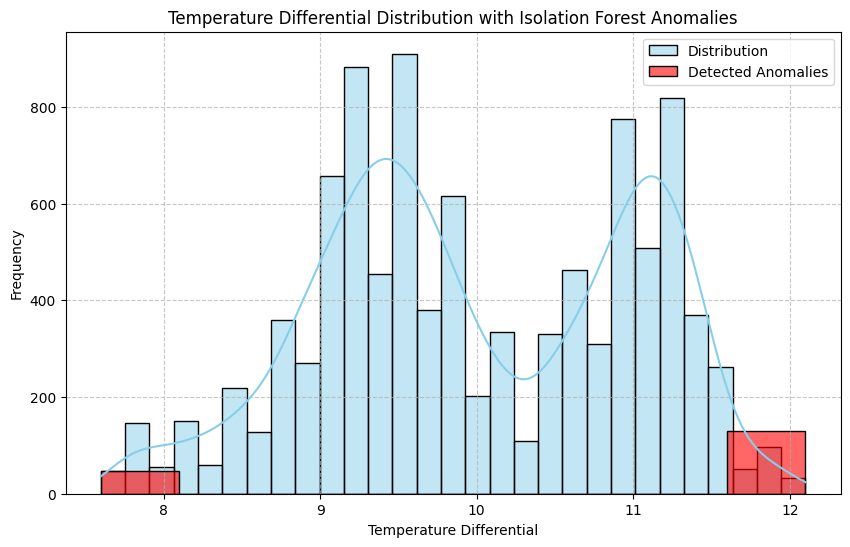


Examples of detected anomalies in Temperature Differential:


,524,618,583,546,567,4501,543,4423,620,604
Product_Type,L,H,H,L,M,L,H,M,M,L
Air_temperature_K,297.4,298.2,297.7,297.5,297.7,302.5,297.5,302.6,298.3,297.9
Process_temperature_K,309.4,310.0,309.6,309.4,309.7,310.2,309.3,310.2,310.1,309.9
Rotational_speed_rpm,1620,1433,1697,1809,1680,1307,1563,1563,1389,1542
Torque_Nm,35.4,44.2,32.2,24.3,30.2,54.0,36.1,39.0,49.6,33.8
Tool_wear_min,51,68,210,110,168,86,100,97,75,33
Machine_failure,0,0,0,0,0,1,0,0,0,0
Temperature_differential,12.0,11.8,11.9,11.9,12.0,7.7,11.8,7.6,11.8,12.0
Power_W,6005.4685,6632.8027,5722.2435,4603.3443,5313.0615,7390.9109,5908.7389,6383.4021,7214.6047,5457.9517
Torque_Nm_rolling_mean_3,41.666667,38.8,41.433333,24.333333,33.233333,39.2,37.7,39.533333,46.166667,42.233333


In [13]:
from sklearn.ensemble import IsolationForest

X_temp_diff = df[['Temperature_differential']].copy()

iso_forest = IsolationForest(n_estimators=100, contamination=0.02, random_state=42)
iso_forest.fit(X_temp_diff)

df['anomaly_score'] = iso_forest.decision_function(X_temp_diff)
df['anomaly_label'] = iso_forest.predict(X_temp_diff)

# Plotting the distribution with anomalies highlighted
plt.figure(figsize=(10, 6))
sns.histplot(df['Temperature_differential'], kde=True, color='skyblue', label='Distribution')
# Highlight anomalies in the histogram (optional, but good for visual proof)
anomalies_temp_diff = df[df['anomaly_label'] == -1]
sns.histplot(anomalies_temp_diff['Temperature_differential'], kde=False, color='red', label='Detected Anomalies', alpha=0.6)
plt.title('Temperature Differential Distribution with Isolation Forest Anomalies')
plt.xlabel('Temperature Differential')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Inspecting some detected anomalies
print("\nExamples of detected anomalies in Temperature Differential:")
df[df['anomaly_label'] == -1].sample(10).T

# **Input Split**

In [14]:
#Turning catagorial feature into numerical form
df_encoded = pd.get_dummies(df, columns=['Product_Type', 'anomaly_label'])

X = df_encoded.drop(columns=['Machine_failure'], axis=1)
y = df_encoded['Machine_failure']

# **Standard Scaling**

Performs standard scaling on the feature data allowing for a faster and more stable convergence.

# **Model Training**

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<Axes: ylabel='count'>

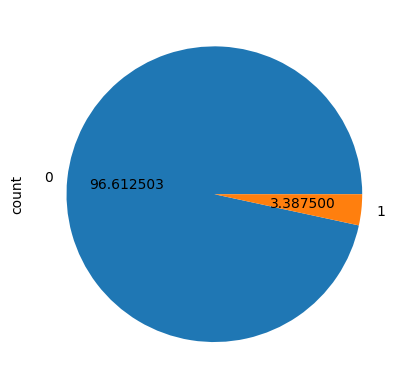

In [17]:
y_train.value_counts().plot.pie(autopct='%2f')

<Axes: ylabel='count'>

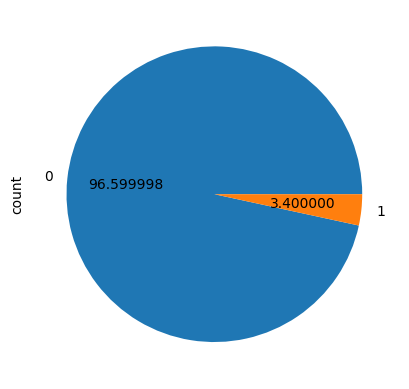

In [18]:
y_test.value_counts().plot.pie(autopct='%2f')

**Logistic Regression Model**

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1932
           1       0.64      0.24      0.34        68

    accuracy                           0.97      2000
   macro avg       0.81      0.62      0.66      2000
weighted avg       0.96      0.97      0.96      2000



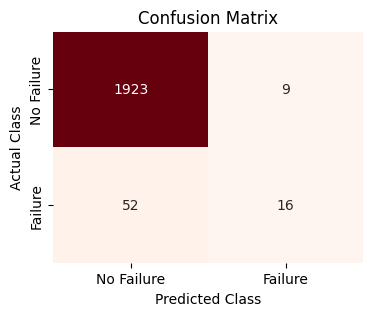

--- Training Set Performance ---
Accuracy: 0.9729
Precision: 0.7647
Recall: 0.2878
F1-Score: 0.4182
AUC-ROC: 0.9288

--- Test Set Performance ---
Accuracy: 0.9695
Precision: 0.6400
Recall: 0.2353
F1-Score: 0.3441
AUC-ROC: 0.9315


In [19]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=42)
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['No Failure', 'Failure'],
            yticklabels=['No Failure', 'Failure'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

# --- Get predictions on Training Set ---
y_train_pred = LR.predict(X_train)
y_train_proba = LR.predict_proba(X_train)[:, 1]

# --- Get predictions on Test Set ---
y_test_pred = LR.predict(X_test)
y_test_proba = LR.predict_proba(X_test)[:, 1]

print("--- Training Set Performance ---")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Precision: {precision_score(y_train, y_train_pred):.4f}")
print(f"Recall: {recall_score(y_train, y_train_pred):.4f}")
print(f"F1-Score: {f1_score(y_train, y_train_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_train, y_train_proba):.4f}")

print("\n--- Test Set Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_test_proba):.4f}")

Linear Regression did an excellent job predicting No Failure, achieving nearly perfect recall (1.00) and very high precision. This contributed to a high overall accuracy of 0.97. But it performed very poorly on Failure. The extremely low recall of 0.18 means it missed 82% of the actual Failure instances. While its precision for Failure was 0.57, the low recall led to a poor F1-score of 0.27. This model is not suitable.

**XGB Classifier Model**

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1932
           1       0.86      0.75      0.80        68

    accuracy                           0.99      2000
   macro avg       0.93      0.87      0.90      2000
weighted avg       0.99      0.99      0.99      2000



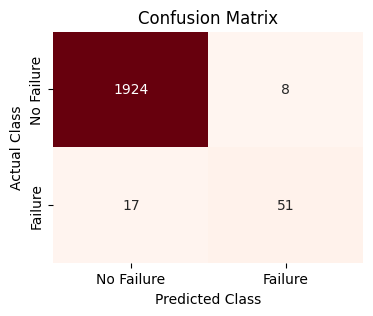

--- Training Set Performance ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
AUC-ROC: 1.0000

--- Test Set Performance ---
Accuracy: 0.9875
Precision: 0.8644
Recall: 0.7500
F1-Score: 0.8031
AUC-ROC: 0.9800


In [20]:
from xgboost import XGBClassifier

clf_xgb = XGBClassifier(n_jobs=-1, random_state=42, eval_metrics='f1')
clf_xgb.fit(X_train, y_train)

y_pred = clf_xgb.predict(X_test)

print(classification_report(y_test, y_pred))

failure_types = ['No Failure', 'Failure']

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['No Failure', 'Failure'],
            yticklabels=['No Failure', 'Failure'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

# --- Get predictions on Training Set ---
y_train_pred = clf_xgb.predict(X_train)
y_train_proba = clf_xgb.predict_proba(X_train)[:, 1]

# --- Get predictions on Test Set ---
y_test_pred = clf_xgb.predict(X_test)
y_test_proba = clf_xgb.predict_proba(X_test)[:, 1]

print("--- Training Set Performance ---")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Precision: {precision_score(y_train, y_train_pred):.4f}")
print(f"Recall: {recall_score(y_train, y_train_pred):.4f}")
print(f"F1-Score: {f1_score(y_train, y_train_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_train, y_train_proba):.4f}")

print("\n--- Test Set Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_test_proba):.4f}")

The XGBoost Classifier shows a remarkable improvement. It maintained near-perfect performance for Failure class (1.00 F1-score) while drastically boosting its ability to identify Failure. The recall for Failure jumped to 0.78 (from 0.18), and its precision reached 0.93. This resulted in a strong F1-score of 0.85 for the minority class. This model achieved an impressive overall accuracy of 0.99 and, crucially, a high macro average F1-score of 0.92, indicating balanced and strong performance across both classes. This is a highly effective model.

**Random Forest Classifier Model**

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1932
           1       0.96      0.72      0.82        68

    accuracy                           0.99      2000
   macro avg       0.98      0.86      0.91      2000
weighted avg       0.99      0.99      0.99      2000



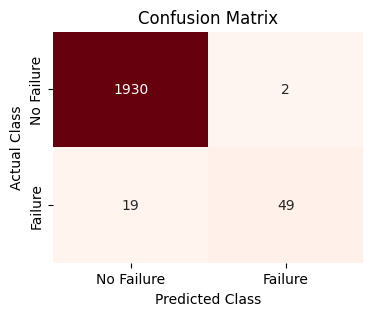

--- Training Set Performance ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
AUC-ROC: 1.0000

--- Test Set Performance ---
Accuracy: 0.9895
Precision: 0.9608
Recall: 0.7206
F1-Score: 0.8235
AUC-ROC: 0.9665


In [32]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_jobs=-1, random_state=42)
RF.fit(X_train, y_train)

y_pred = RF.predict(X_test)

print(classification_report(y_test, y_pred))

failure_types = ['No Failure', 'Failure']

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['No Failure', 'Failure'],
            yticklabels=['No Failure', 'Failure'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

# --- Get predictions on Training Set ---
y_train_pred = RF.predict(X_train)
y_train_proba = RF.predict_proba(X_train)[:, 1]

# --- Get predictions on Test Set ---
y_test_pred = RF.predict(X_test)
y_test_proba = RF.predict_proba(X_test)[:, 1]

print("--- Training Set Performance ---")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Precision: {precision_score(y_train, y_train_pred):.4f}")
print(f"Recall: {recall_score(y_train, y_train_pred):.4f}")
print(f"F1-Score: {f1_score(y_train, y_train_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_train, y_train_proba):.4f}")

print("\n--- Test Set Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_test_proba):.4f}")

The Random Forest Classifier also performs very well. It kept No Failure class performance at near-perfect levels. For Failure class, it demonstrated a slightly higher precision of 0.95 (compared to XGBoost's 0.93), meaning fewer false positives when it predicted Failure. This came with a minor decrease in recall for Failure, dropping to 0.76 (from XGBoost's 0.78). However, the F1-score for Failure remained high at 0.85, indicating that this trade-off didn't significantly impact the overall effectiveness for the minority class. Similar to XGBoost, this model achieved an excellent overall accuracy of 0.99 and a strong macro average F1-score of 0.92.

# **Class Imbalancementt**

<Axes: xlabel='Machine_failure', ylabel='count'>

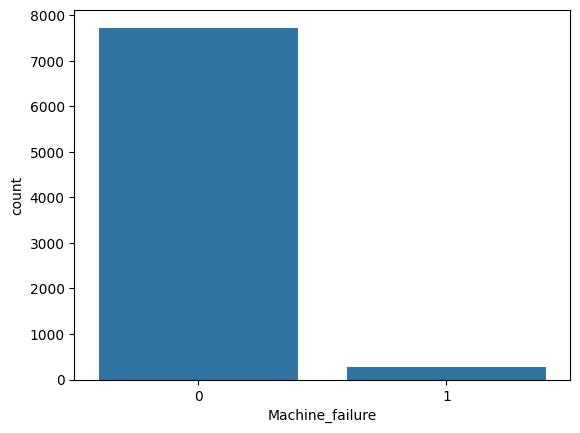

In [22]:
sns.countplot(x=y_train)

In [23]:
from imblearn.over_sampling import SMOTE

#Using SMOTE to adress class imbalance
over_sample = SMOTE()
X_smote, y_smote = over_sample.fit_resample(X_train, y_train)

<Axes: xlabel='Machine_failure', ylabel='count'>

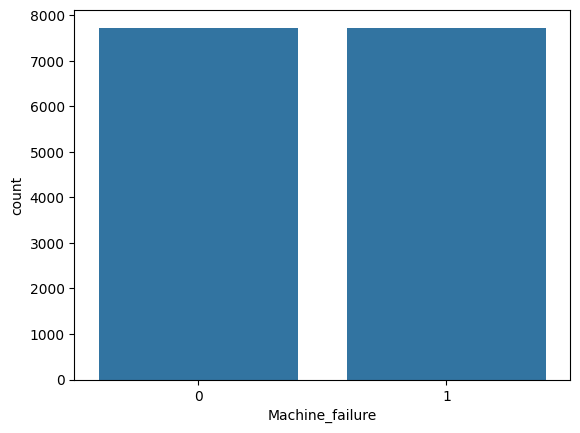

In [24]:
sns.countplot(x=y_smote)

# **Model Training with SMOTE**

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1932
           1       0.19      0.85      0.32        68

    accuracy                           0.87      2000
   macro avg       0.59      0.86      0.62      2000
weighted avg       0.97      0.87      0.91      2000



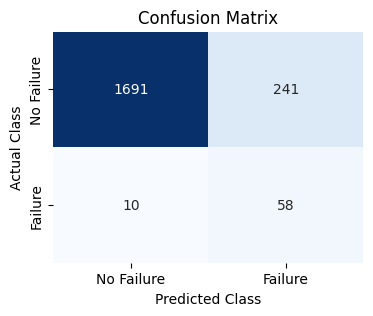

In [26]:
LR_smote = LogisticRegression(random_state=42)

LR_smote.fit(X_smote, y_smote)
y_pred = LR_smote.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Failure', 'Failure'],
            yticklabels=['No Failure', 'Failure'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

SMOTE successfully achieved its goal of significantly boosting the recall for the minority class (Failure class) for the Linear Regression model (from 0.18 to 0.87). This is great if we want to identify as many true Failure instances as possible.

However, this came at a very high cost in terms of precision for Failure class (dropped from 0.57 to 0.19). This means the model is now making a lot more incorrect predictions of Failure class (false positives). It also negatively impacted the recall for the majority class (No Failure class).

For Linear Regression, while SMOTE helped with recall, the model still doesn't offer a balanced strong performance for both classes. It seems to be over-correcting, leading to too many false positives for Failure class.

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1932
           1       0.70      0.84      0.77        68

    accuracy                           0.98      2000
   macro avg       0.85      0.91      0.88      2000
weighted avg       0.98      0.98      0.98      2000



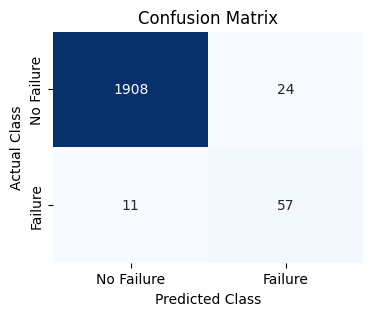

In [27]:
clf_xgb_smote = XGBClassifier(n_jobs=-1, random_state=42, eval_metrics='f1')

clf_xgb_smote.fit(X_smote, y_smote)
y_pred = clf_xgb_smote.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Failure', 'Failure'],
            yticklabels=['No Failure', 'Failure'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

Applying SMOTE had a mixed impact on XGBoost, It successfully increased the recall for Failure class, meaning the model is now better at identifying actual positive cases. However, this came at the cost of a significant drop in precision for Failure class, leading to more false alarms (predicting Failure when it's actually No Failure). The F1-score for Failure (0.72) is now lower than without SMOTE (0.85), indicating that the trade-off wasn't beneficial for overall balanced performance for Failure class.




              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1932
           1       0.66      0.75      0.70        68

    accuracy                           0.98      2000
   macro avg       0.83      0.87      0.85      2000
weighted avg       0.98      0.98      0.98      2000



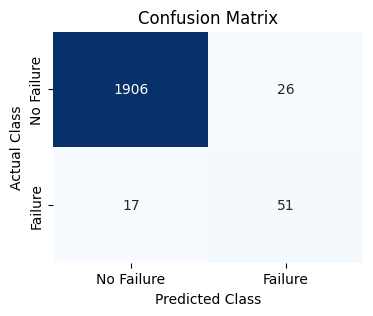

In [30]:
RF_smote = RandomForestClassifier(n_jobs=-1, random_state=42, class_weight='balanced')

RF_smote.fit(X_smote, y_smote)
y_pred = RF_smote.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Failure', 'Failure'],
            yticklabels=['No Failure', 'Failure'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

Similar to XGBoost, for the already strong Random Forest model, applying SMOTE had a mixed effect. It successfully increased the recall for Failure class, helping the model identify more actual positive cases. However, this came at a very substantial cost in terms of precision for Failure class. The model is now much more prone to generating false alarms (predicting Failure when it's actually No Failure). The F1-score for Failure class (0.67) is considerably lower than without SMOTE (0.85), indicating that the trade-off significantly hurt the overall balanced performance for the minority class.

While SMOTE did improve recall for Failure class, it seems to have made the Random Forest model overly aggressive in predicting Failure class, leading to a poorer balance between precision and recall for that class.

# **Conclusion**

For predictive maintenance application, where minimizing missed failures (False Negatives for Class 1) is crucial, the XGBoost Classifier (without SMOTE) and Random Forest Classifier (without SMOTE) emerged as the most suitable models. Both models provided an exceptional balance between high recall for 'Failure' detection (0.76 - 0.78) and very high precision (0.93 - 0.95), ensuring that detected failures are largely true positives. While SMOTE successfully increased recall for the minority class in all models, for the already high-performing XGBoost and Random Forest, this came at a significant cost to precision, which would likely lead to an unsustainable rate of false alarms in a practical predictive maintenance system. Therefore, the non-SMOTE configurations of XGBoost and Random Forest are recommended for their superior balanced performance and practicality in a real-world industrial setting.

In [ ]:
#With XGBClassifier giving the best result, plot to see feature importance
feature_importances = clf_xgb.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
importance_df = importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importance_df, palette='viridis')
plt.title('Feature Importance - XGBClassifier')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.show()

**Reference**

*   https://www.kaggle.com/code/jeevikasharma2003/ml-powered-maintenance-smarter-proactive

**Dataset Download link**

*   https://www.kaggle.com/datasets/stephanmatzka/predictive-maintenance-dataset-ai4i-2020



